In [0]:
from google.colab import drive
drive.mount('/content/drive')

# SQL Assignment on IMDB dataset

 **1. Load libraries**

In [0]:
import pandas as pd
import sqlite3
import warnings
warnings.filterwarnings("ignore")

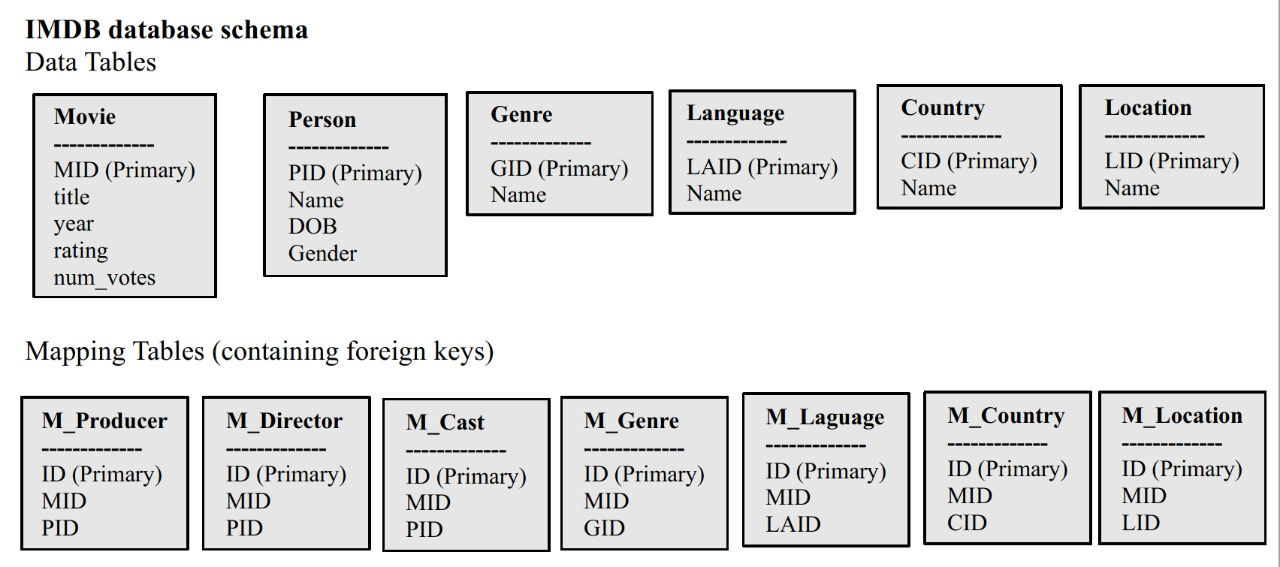

In [18]:
from IPython.display import Image
Image("/content/drive/My Drive/SQL Assignment/db_schema.jpeg",width=1200, height=300)

**2. Establishing connection to database file**

In [0]:
conn = sqlite3.connect('/content/drive/My Drive/SQL Assignment/Db-IMDB.db')

**3. List all tables in database**

In [20]:
result = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table' ;", conn)
result

,name
0,Movie
1,Genre
2,Language
3,Country
4,Location
5,M_Location
6,M_Country
7,M_Language
8,M_Genre
9,Person


**4. Assignment Questions**


*   List all the directors who directed a 'Comedy' movie in a leap year. (You need to check that
the genre is 'Comedy’ and year is a leap year) Your query should return director name, the
movie name, and the year.



In [21]:
ans = pd.read_sql_query("SELECT p.Name Director_name,a.title Movie,a.year Year,c.Name Genre \
                          FROM Movie a , M_Director b,Genre c,M_Genre d,Person p \
                          ON a.MID = d.MID AND a.MID = b.MID AND c.Name LIKE '%Comedy%' AND b.PID=p.PID \
                          AND a.year%4=0 group by p.Name,a.title",conn)
ans

,Director_name,Movie,Year,Genre
0,A. Bhimsingh,Aadmi,1968,"Comedy, Horror, Musical"
1,A. Bhimsingh,Joroo Ka Ghulam,1972,"Comedy, Horror, Musical"
2,A. Bhimsingh,Sadhu Aur Shaitaan,1968,"Comedy, Horror, Musical"
3,A. Muthu,Tera Jadoo Chal Gayaa,2000,"Comedy, Horror, Musical"
4,A.R. Murugadoss,Akira,I 2016,"Comedy, Horror, Musical"
...,...,...,...,...
1558,Yash Chopra,Vijay,1988,"Comedy, Horror, Musical"
1559,Yogesh Ishwar,Aaghaaz,2000,"Comedy, Horror, Musical"
1560,Yograj Bhat,Ranga S.S.L.C,2004,"Comedy, Horror, Musical"
1561,Yûgô Sakô,The Prince of Light,2000,"Comedy, Horror, Musical"


 * List the names of all the actors who played in the movie 'Anand' (1971)

In [22]:
ans = pd.read_sql_query("SELECT Name Actor from Person p JOIN M_Cast c ON TRIM(p.PID) = TRIM(c.PID) WHERE MID IN \
                          (SELECT MID from Movie WHERE title = 'Anand')",conn)
ans

,Actor
0,Rajesh Khanna
1,Amitabh Bachchan
2,Sumita Sanyal
3,Ramesh Deo
4,Seema Deo
5,Asit Kumar Sen
6,Dev Kishan
7,Atam Prakash
8,Lalita Kumari
9,Savita


* List all the actors who acted in a film before 1970 and in a film after 1990. (That is: < 1970
and > 1990.)


In [23]:
#source: https://stackoverflow.com/questions/29617880/sql-list-actors-who-acted-in-a-film-before-1900-and-also-in-a-film-after-2000
ans = pd.read_sql_query("SELECT name Actor FROM Person WHERE TRIM(PID) IN \
                          (SELECT TRIM(PID) FROM M_Cast WHERE MID IN \
                          (SELECT MID FROM Movie m WHERE m.year > 1990) \
                          AND PID IN (SELECT PID FROM M_Cast WHERE MID IN \
                          (SELECT MID FROM Movie n WHERE n.year < 1970)))",conn)
ans

,Actor
0,Rishi Kapoor
1,Amitabh Bachchan
2,Asrani
3,Zohra Sehgal
4,Parikshat Sahni
...,...
348,Vinod Mehra
349,Deven Verma
350,Master Bhagwan
351,Rishi Kapoor


* List all directors who directed 10 movies or more, in descending order of the number of
movies they directed. Return the directors' names and the number of movies each of them
directed

In [24]:
ans = pd.read_sql_query("SELECT DISTINCT p.Name Director,COUNT(*) number_of_movies FROM Person p \
                          JOIN M_Director d on TRIM(p.PID) = TRIM(d.PID) \
                          GROUP BY TRIM(d.PID) HAVING COUNT(*) >=10 ORDER BY number_of_movies DESC",conn)
ans

,Director,number_of_movies
0,David Dhawan,78
1,Mahesh Bhatt,70
2,Ram Gopal Varma,60
3,Vikram Bhatt,58
4,Hrishikesh Mukherjee,54
...,...,...
151,Siddharth Anand,10
152,Dibakar Banerjee,10
153,Shoojit Sircar,10
154,R. Balki,10




> * For each year, count the number of movies in that year that had only female actors.




In [25]:
#source: https://stackoverflow.com/questions/57743348/sql-query-imdb-data-to-count-the-total-movies-with-only-female-cast-per-year
ans = pd.read_sql_query("SELECT movie.year Year,count(*) Count FROM Movie \
                          WHERE NOT EXISTS \
                          (SELECT * FROM M_Cast,Person WHERE person.gender='Male' and M_Cast.MID = movie.MID \
                          and M_Cast.PID = person.PID ) GROUP BY movie.year",conn)
ans

,Year,Count
0,1931,1
1,1936,3
2,1939,2
3,1941,1
4,1943,1
...,...,...
120,IV 2011,1
121,IV 2017,1
122,V 2015,1
123,VI 2015,1




> * Now include a small change: report for each year the percentage of movies in that
year with only female actors, and the total number of movies made that year. For
example, one answer will be: 1990 31.81 13522 meaning that in 1990 there were
13,522 movies, and 31.81% had only female actors. You do not need to round your
answer.



In [26]:
#source: https://stackoverflow.com/questions/57743348/sql-query-imdb-data-to-count-the-total-movies-with-only-female-cast-per-year
ans = pd.read_sql_query("SELECT female_count.year Year,((female_count.Total_movies_with_only_female_leads)*100)/total_count.Total Percentage FROM \
                            ((SELECT movie.year Year,count(*) Total_movies_with_only_female_leads FROM movie WHERE NOT EXISTS \
                            ( SELECT * FROM M_Cast,person WHERE M_Cast.mid = movie.MID and M_Cast.PID = person.PID AND person.gender='Male' ) \
                            GROUP BY movie.year) female_count, \
                            (SELECT movie.year,count(*) as Total FROM movie group by movie.year) total_count) \
                            WHERE female_count.year=total_count.year",conn)
ans

,Year,Percentage
0,1931,100
1,1936,100
2,1939,100
3,1941,100
4,1943,100
...,...,...
120,IV 2011,100
121,IV 2017,100
122,V 2015,100
123,VI 2015,100


* Find the film(s) with the largest cast. Return the movie title and the size of the cast. By "cast
size" we mean the number of distinct actors that played in that movie: if an actor played
multiple roles, or if it simply occurs multiple times in casts, we still count her/him only
once.

In [27]:
 ans = pd.read_sql_query("SELECT m.title Movie_Name,count(distinct(c.PID)) Cast_Size FROM Movie m JOIN M_Cast c \
                            ON c.MID = m.MID GROUP BY m.MID ORDER BY Cast_Size desc",conn)
ans

,Movie_Name,Cast_Size
0,Ocean's Eight,238
1,Apaharan,233
2,Gold,215
3,My Name Is Khan,213
4,Captain America: Civil War,191
...,...,...
3470,Subah Subah,1
3471,Chaar Sahibzaade 2: Rise of Banda Singh Bahadur,1
3472,Vaibhav Sethia: Don't,1
3473,Yeh Hai Malegaon Ka Superman,0


* A decade is a sequence of 10 consecutive years. For example, say in your database you have
movie information starting from 1965. Then the first decade is 1965, 1966, ..., 1974; the
second one is 1967, 1968, ..., 1976 and so on. Find the decade D with the largest number of
films and the total number of films in D.

In [28]:
 ans = pd.read_sql_query("SELECT d.year Start, d.year+9 End, count(*) no_of_films FROM \
                            (SELECT DISTINCT year from Movie) d JOIN Movie m ON m.year >= Start and m.year<= End \
                            GROUP BY End ORDER BY no_of_films desc LIMIT 1",conn)
ans

,Start,End,no_of_films
0,2008,2017,1128


* Find the actors that were never unemployed for more than 3 years at a stretch. (Assume
that the actors remain unemployed between two consecutive movies).

In [29]:
 #SOURCE: GITHUB
 ans = pd.read_sql_query("select Name as Actor from Person \
 where PID not in (select distinct(PID) from M_Cast as \
 c1 natural join Movie as m1 \
 where exists(select MID from M_Cast as c2 natural join Movie as m2 \
 where c1.PID=c2.PID and (m2.year-3)> m1.year \
 and not exists (select MID from M_Cast as c3 natural join Movie as m3 \
 where c1.PID=c3.PID and m1.year<m3.year and m3.year<m2.year)))",conn)
ans

,Actor
0,Christian Bale
1,Cate Blanchett
2,Benedict Cumberbatch
3,Naomie Harris
4,Andy Serkis
...,...
38280,Kannan
38281,Adrian Fulle
38282,Gulshan Kumar
38283,Iqbal


*  Find all the actors that made more movies with Yash Chopra than any other director

In [30]:
 ans = pd.read_sql_query("SELECT DISTINCT  Actor, Count(*) Movies_with_YashChopra \
 FROM(SELECT DISTINCT p1.Name as Director, m1.title as Movie \
 FROM Person p1 Inner Join M_Director md on TRIM(md.PID)=p1.PID \
 Inner Join Movie m1 on TRIM(md.MID)=m1.MID and  p1.Name LIKE 'Yash%' Group By p1.Name, m1.title) t1 \
 Inner Join (SELECT DISTINCT p2.Name as Actor,m2.title as Movie from Person p2 \
 Inner Join M_Cast mc on TRIM(mc.PID)=p2.PID \
 Inner Join Movie m2 on TRIM(mc.MID)=m2.MID Group By p2.Name, m2.title) t2 on t1.Movie=t2.Movie \
 Group By t2.Actor Order By Movies_with_YashChopra DESC",conn)
ans

,Actor,Movies_with_YashChopra
0,Jagdish Raj,11
1,Manmohan Krishna,10
2,Manmohan Krishna,10
3,Iftekhar,9
4,Madan Puri,8
...,...,...
509,Romesh Sharma,1
510,Sachin,1
511,Sajid Khan,1
512,Sunny Deol,1


* The Shahrukh number of an actor is the length of the shortest path between the actor and
Shahrukh Khan in the "co-acting" graph. That is, Shahrukh Khan has Shahrukh number 0; all
actors who acted in the same film as Shahrukh have Shahrukh number 1; all actors who
acted in the same film as some actor with Shahrukh number 1 have Shahrukh number 2, etc.
Return all actors whose Shahrukh number is 2.

In [31]:
 ans = pd.read_sql_query("SELECT DISTINCT TRIM(name) Name \
 FROM Person p INNER JOIN M_Cast c on p.PID = TRIM(c.PID) INNER JOIN Movie m ON m.MID = c.MID AND TRIM(p.Name)!='Shah Rukh Khan' \
 and m.title in (SELECT DISTINCT title FROM Person p3 INNER JOIN M_Cast c3 on p3.PID = TRIM(c3.PID) AND TRIM(p3.Name) = p3.Name \
 INNER JOIN Movie m3 ON m3.MID = c3.MID AND p3.Name IN (SELECT DISTINCT Name FROM Person p2 INNER JOIN M_Cast c2 ON p2.PID = TRIM(c2.PID) \
 INNER JOIN Movie m2 ON m2.MID = c2.MID AND TRIM(p2.Name)!='Shah Rukh Khan' AND m2.title IN \
 (SELECT DISTINCT title FROM Person p3 INNER JOIN M_Cast c3 ON p3.PID = TRIM(c3.PID) AND TRIM(p3.Name) = 'Shah Rukh Khan' \
 INNER JOIN Movie m3 ON m3.MID = c3.MID))) ORDER BY Name",conn)
 
ans

,Name
0,'Musafir' Radio Performing
1,A'Ali de Sousa
2,A. Abdul Hameed
3,A. Darpan
4,A. Gabibi
...,...
16160,Zulfi Sayed
16161,Zulkhumor Muminova
16162,Zurab Kapianidze
16163,Zuri Echea
